様々な一変数関数を入力に与え、予測させる

In [126]:
#学習セットと訓練セットに分割する関数
def divide_train_and_test(X, y, train_ratio):
    num_train = int(X.shape[0] * train_ratio)
    X_train, X_test = X[:num_train], X[num_train:]
    y_train, y_test = y[:num_train], y[num_train:]
    return X_train, X_test, y_train, y_test
    

In [127]:
#累乗の特徴量を作る関数(多項式回帰で用いる)
def make_pow(X, n):
    X_b = X.tolist()
    for i, val in enumerate(X_b):
        val = float(val[0])
        X_b[i] = [val**k for k in range(1, n+1)]
        X_b[i] = tuple(X_b[i])
    X_b = np.array(X_b)
    return X_b

In [128]:
#バイアス項に掛ける項を挿入する
#def insert_ones(X):
    #new_X = np.ones((X.shape[0] + 1, X.shape[1]))
    #for i in range(1, X.shape[0] + 1):
        #new_X[i] = X[i - 1]
    #return new_X

In [129]:
#バイアス項に掛ける項を挿入する
def insert_ones(X):
    new_X = np.c_[np.ones((X.shape[0], )), X]
    return new_X

In [130]:
#mseの勾配を算出
def gradient(X, y, theta, sumple_num):
    return 2 / sumple_num * X.T.dot(X.dot(theta) - y)

In [131]:
#勾配降下法
def gradient_descent(X, y, eta, iteration):
    theta = rng.random(size=(X.shape[1], 1))
    for i in range(iteration):
        grad = gradient(X, y, theta, y.shape[0])
        theta -= eta * grad
    return theta

In [132]:
#予測を算出
def predict_val(X, weight):
    return X.dot(weight)

In [161]:
#mseを算出
def mse(label, predict):
    mse = 0
    for i in range(label.shape[0]):
        mse += (predict[i] - label[i])**2
    mse /= label.shape[0]
    return mse

In [163]:
#早期打ち切り、何次関数のモデルが最適かを判断する

パイプライン化

In [157]:
def linear_regression(X, y, train_ratio=0.75, dimension=3, eta=0.1, iteration=100, retval='mse'):
    X_train, X_test, y_train, y_test = divide_train_and_test(X, y, train_ratio)
    X_poly = make_pow(X_train, dimension)
    X_data = insert_ones(X_poly)
    theta = gradient_descent(X_data, y_train, eta, iteration)
    y_predict = predict_val(X_data, theta)
    plt.plot(X_train, y_train, 'b.')
    plt.plot(X_train, y_predict, 'r.')
    plt.show()
    
    if (retval == 'weight'):
        return theta
    elif (retval == 'mse'):
        X_test_poly = make_pow(X_test, dimension)
        X_test_data = insert_ones(X_test_poly)
        y_test_predict = predict_val(X_test_data, theta)
        return mse(y_test, y_test_predict)

１つ目
```math
y = 5 * x + 4
```

In [135]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [136]:
rng = np.random.default_rng()

In [143]:
sample_num = 100
X = 3 * rng.random((sample_num, 1))
y = 5 * X + 4 + rng.standard_normal((sample_num, 1))

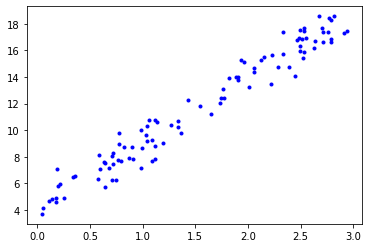

In [139]:
plt.plot(X, y, 'b.')
plt.show()

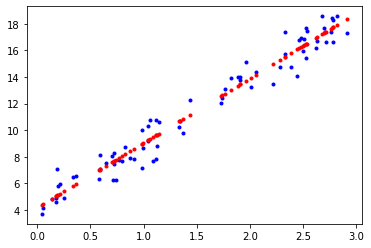

array([0.81800073])

In [140]:
linear_regression(X, y, dimension=1)

２つ目
```math
y = X**2 + 4
```

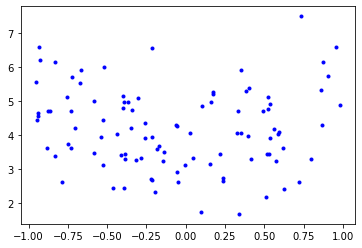

In [145]:
X = 2 * rng.random((sample_num, 1)) - 1
y = X**2 + 4 + rng.standard_normal((sample_num, 1))
plt.plot(X, y, 'b.')
plt.show()

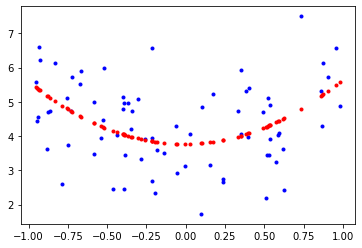

array([1.13018976])

In [162]:
linear_regression(X, y, dimension=2)